# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Andre Gregori Sangari
- Email: andresangari12@gmail.com
- Id Dicoding: andregregs12

## Persiapan

### Menyiapkan library yang dibutuhkan

#### 📊 Setup Environment dan Data Loading

🎯 Tahap 1: Import Libraries
Mengimport semua library yang diperlukan untuk proyek data science ini, termasuk library untuk manipulasi data (pandas, numpy), visualisasi (matplotlib, seaborn), dan machine learning (scikit-learn).

📂 Tahap 2: Load Dataset
Memuat dataset dari file CSV dengan delimiter semicolon dan melakukan pemeriksaan awal struktur data.
Melakukan analisis eksplorasi data untuk memahami:
- **Struktur Dataset**: Ukuran, kolom, dan tipe data
- **Kualitas Data**: Deteksi missing values
- **Target Variable**: Distribusi kelas pada kolom 'Status'

**Output yang dihasilkan:**
- Konfirmasi berhasil import libraries
- Informasi ukuran dataset (baris × kolom)
- Preview 5 baris pertama data
- Daftar nama kolom
- Tipe data setiap kolom
- Status missing values
- Distribusi dan persentase target variable

**Insight Penting**: Tahap ini memberikan pemahaman dasar tentang dataset sebelum melanjutkan ke tahap preprocessing dan modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Semua library berhasil diimport!")

✅ Semua library berhasil diimport!


### Menyiapkan data yang akan diguankan

Memuat dataset dari file CSV dengan delimiter semicolon dan melakukan pemeriksaan awal struktur data.

In [ ]:
# Load dataset
df = pd.read_csv('data.csv', delimiter=';')

print("📊 Dataset berhasil dimuat!")
print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Tampilkan 5 baris pertama
print("\n🔍 5 baris pertama data:")
print(df.head())

# Informasi dasar dataset
print("\n📋 Informasi kolom:")
print(df.columns.tolist())

# Cek tipe data
print("\n🔢 Tipe data:")
print(df.dtypes)

# Cek missing values
print("\n❓ Missing values:")
missing_count = df.isnull().sum()
if missing_count.sum() == 0:
    print("✅ Tidak ada missing values!")
else:
    print(missing_count[missing_count > 0])

# Cek target variable (Status)
print("\n🎯 Distribusi target variable (Status):")
print(df['Status'].value_counts())
print("\nPersentase:")
print(df['Status'].value_counts(normalize=True) * 100)

print("\n✅ Persiapan data selesai!")

📊 Dataset berhasil dimuat!
Ukuran dataset: (4424, 37)
Jumlah baris: 4424
Jumlah kolom: 37

🔍 5 baris pertama data:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1  

Insight Penting: Tahap ini memberikan pemahaman dasar tentang dataset sebelum melanjutkan ke tahap preprocessing dan modeling.

## Data Understanding

🎯 Tujuan Tahap Ini
Melakukan analisis komprehensif untuk memahami karakteristik dataset, distribusi variabel, dan pola-pola penting yang dapat mempengaruhi model prediksi dropout siswa.

📈 Analisis yang Dilakukan:

1. **Statistik Deskriptif**
- Menggunakan `df.describe()` untuk mendapatkan ringkasan statistik semua variabel numerik
- Informasi meliputi: mean, std, min, max, dan quartiles

 2. **Profil Dataset**
- **Total observasi**: Jumlah siswa dalam dataset
- **Komposisi fitur**: Pembagian antara fitur numerik dan kategorikal
- **Kelengkapan data**: Status missing values per fitur

3. **Analisis Target Variable (Status)**
- Distribusi 3 kategori: Graduate, Dropout, Enrolled
- Perhitungan persentase setiap kategori
- **Pembuatan target binary** (`target`): 1 untuk Dropout, 0 untuk lainnya
- **Tingkat dropout**: Persentase siswa yang dropout sebagai metrik kunci

4. **Analisis Fitur Kunci**

**Demografi**
- **Usia saat mendaftar**: Rata-rata, minimum, dan maksimum usia
- **Gender**: Distribusi laki-laki vs perempuan

**Performa Akademik**
- **Admission grade**: Nilai saat masuk
- **Semester 1 & 2**: Nilai rata-rata per semester
- Indikator awal performa akademik siswa

**Status Keuangan**
- **Pembayaran uang kuliah**: Persentase siswa dengan pembayaran lancar
- **Penerima beasiswa**: Jumlah dan persentase penerima beasiswa

📊 Visualisasi Data

Membuat 4 visualisasi utama untuk memahami pola data:

1. **Pie Chart**: Distribusi status siswa (Graduate/Dropout/Enrolled)
2. **Histogram**: Sebaran usia saat mendaftar
3. **Bar Chart**: Hubungan gender dengan status siswa
4. **Histogram Berlapis**: Perbandingan nilai semester 1 berdasarkan status

🔍 Key Insights yang Diharapkan:
- **Tingkat dropout rate** sebagai baseline problem
- **Faktor risiko utama** yang berkorelasi dengan dropout
- **Pola distribusi** variabel penting untuk feature engineering
- **Imbalance data** untuk menentukan strategi sampling

**Output**: Pemahaman mendalam tentang karakteristik dataset yang akan menginformasikan strategi preprocessing dan modeling selanjutnya.


📊 Statistik Deskriptif:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.0000

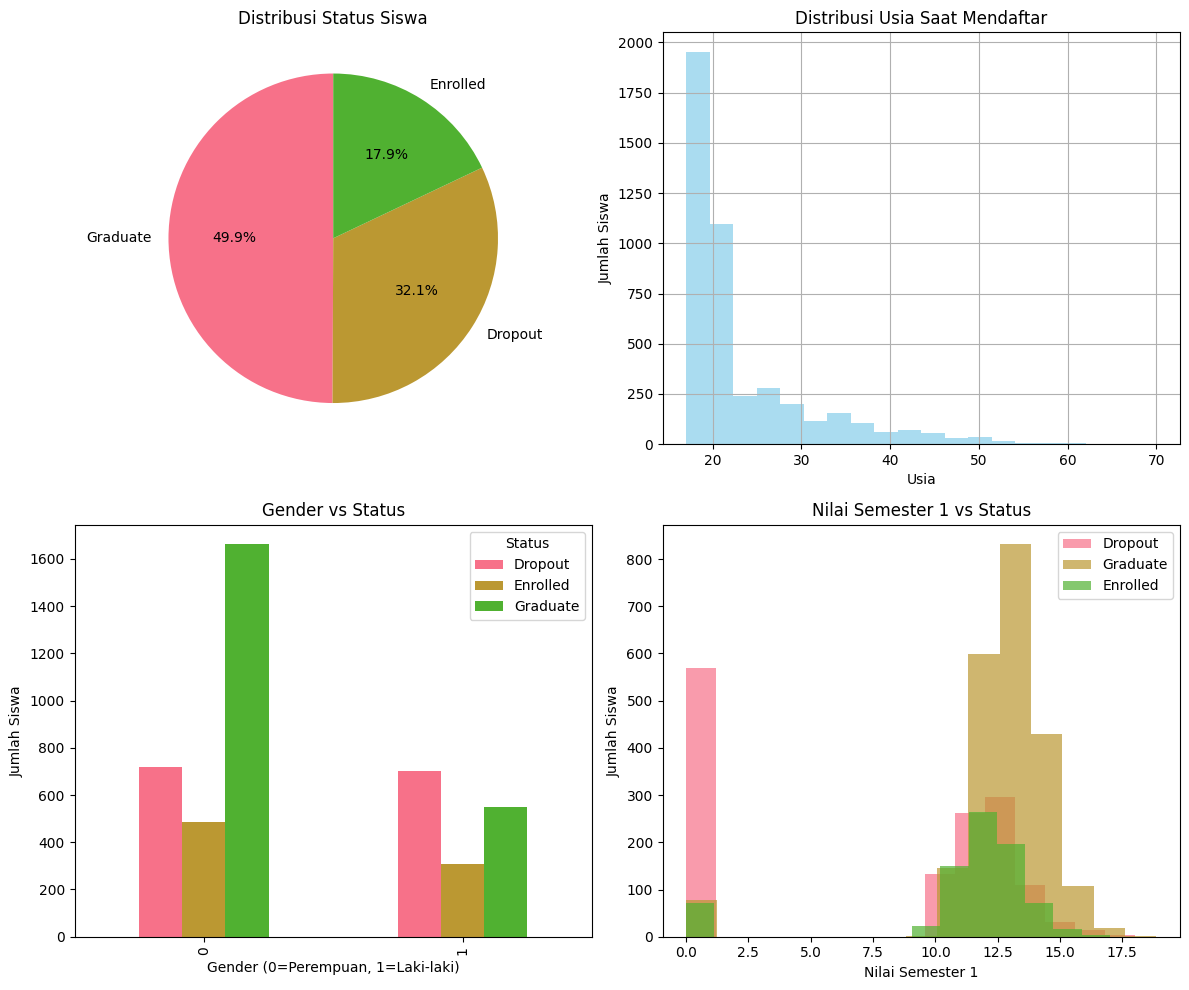

✅ Visualisasi selesai!


In [ ]:
# Statistik deskriptif
print("\n📊 Statistik Deskriptif:")
print(df.describe())

# Informasi detail dataset
print(f"\n📋 Informasi Detail Dataset:")
print(f"- Total siswa: {len(df):,}")
print(f"- Total fitur: {len(df.columns)}")
print(f"- Fitur numerik: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"- Fitur kategorikal: {len(df.select_dtypes(include=['object']).columns)}")

# Analisis target variable lebih detail
print(f"\n🎯 Analisis Target Variable (Status):")
status_counts = df['Status'].value_counts()
for status, count in status_counts.items():
    percentage = (count / len(df)) * 100
    print(f"- {status}: {count:,} siswa ({percentage:.1f}%)")

# Buat binary target untuk analisis dropout
df['target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
dropout_rate = df['target'].mean() * 100
print(f"\n🚨 Tingkat Dropout: {dropout_rate:.1f}%")

# Analisis fitur penting
print(f"\n🔍 Analisis Fitur Kunci:")

# Age at enrollment
print(f"📅 Usia saat mendaftar:")
print(f"- Rata-rata: {df['Age_at_enrollment'].mean():.1f} tahun")
print(f"- Rentang: {df['Age_at_enrollment'].min()} - {df['Age_at_enrollment'].max()} tahun")

# Academic performance
print(f"\n📚 Performa Akademik:")
print(f"- Rata-rata nilai masuk: {df['Admission_grade'].mean():.1f}")
print(f"- Rata-rata nilai semester 1: {df['Curricular_units_1st_sem_grade'].mean():.1f}")
print(f"- Rata-rata nilai semester 2: {df['Curricular_units_2nd_sem_grade'].mean():.1f}")

# Financial status
print(f"\n💰 Status Keuangan:")
tuition_ok = (df['Tuition_fees_up_to_date'] == 1).sum()
scholarship = (df['Scholarship_holder'] == 1).sum()
print(f"- Siswa dengan pembayaran lancar: {tuition_ok:,} ({tuition_ok/len(df)*100:.1f}%)")
print(f"- Penerima beasiswa: {scholarship:,} ({scholarship/len(df)*100:.1f}%)")

# Gender distribution
print(f"\n👥 Distribusi Gender:")
gender_counts = df['Gender'].value_counts()
for gender, count in gender_counts.items():
    gender_name = "Perempuan" if gender == 0 else "Laki-laki"
    percentage = (count / len(df)) * 100
    print(f"- {gender_name}: {count:,} ({percentage:.1f}%)")

print("\n✅ Data Understanding selesai!")

# Visualisasi sederhana
print("\n📊 Membuat visualisasi...")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Distribusi Status
status_counts.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribusi Status Siswa')
axes[0,0].set_ylabel('')

# 2. Distribusi Usia
df['Age_at_enrollment'].hist(bins=20, ax=axes[0,1], alpha=0.7, color='skyblue')
axes[0,1].set_title('Distribusi Usia Saat Mendaftar')
axes[0,1].set_xlabel('Usia')
axes[0,1].set_ylabel('Jumlah Siswa')

# 3. Gender vs Status
gender_status = pd.crosstab(df['Gender'], df['Status'])
gender_status.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Gender vs Status')
axes[1,0].set_xlabel('Gender (0=Perempuan, 1=Laki-laki)')
axes[1,0].set_ylabel('Jumlah Siswa')
axes[1,0].legend(title='Status')

# 4. Nilai Semester 1 vs Status
for status in df['Status'].unique():
    subset = df[df['Status'] == status]['Curricular_units_1st_sem_grade']
    axes[1,1].hist(subset, alpha=0.7, label=status, bins=15)
axes[1,1].set_title('Nilai Semester 1 vs Status')
axes[1,1].set_xlabel('Nilai Semester 1')
axes[1,1].set_ylabel('Jumlah Siswa')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("✅ Visualisasi selesai!")

Output: Pemahaman mendalam tentang karakteristik dataset yang akan menginformasikan strategi preprocessing dan modeling selanjutnya.

## Data Preparation / Preprocessing


#### 🎯 Tujuan Tahap Ini
Mempersiapkan data untuk modeling dengan melakukan cleaning, transformasi, dan feature engineering untuk mengoptimalkan performa model machine learning dalam memprediksi dropout siswa.

📋 Langkah-langkah Preprocessing:

1️⃣ **Penanganan Missing Values**
- **Deteksi**: Mengecek jumlah total missing values di seluruh dataset
- **Strategi**: Untuk kolom numerik, menggunakan nilai median sebagai pengganti
- **Alasan**: Median lebih robust terhadap outliers dibandingkan mean
- **Output**: Konfirmasi status missing values dan tindakan yang diambil

2️⃣ **Pembuatan Target Variable**
- **Transformasi**: Mengubah target menjadi binary classification
  - `1` = Dropout (kasus positif yang ingin diprediksi)
  - `0` = Non-Dropout (Graduate + Enrolled)
- **Validasi**: Memastikan kedua kelas tersedia untuk klasifikasi
- **Distribusi**: Menampilkan proporsi setiap kelas untuk mengidentifikasi imbalance

3️⃣ **Feature Engineering**
Membuat fitur baru yang lebih informatif:

📊 **Fitur Akademik**
- **`avg_semester_grade`**: Rata-rata nilai semester 1 dan 2
- **`grade_improvement`**: Selisih nilai semester 2 - semester 1 (menunjukkan progress)
- **`success_rate_sem1`**: Rasio mata kuliah yang berhasil diselesaikan di semester 1

💡 **Rasional**
- Fitur turunan sering lebih predictive daripada fitur asli
- Menangkap pola dan tren yang tidak terlihat di fitur individual

4️⃣ **Penanganan Outliers**
- **Metode**: IQR (Interquartile Range) dengan batas konservatif (3×IQR)
- **Strategi**: Clipping (bukan removal) untuk mempertahankan ukuran dataset
- **Alasan**: Menghindari kehilangan informasi penting sambil mengurangi noise

5️⃣ **Pemisahan Features dan Target**
- **Features (X)**: Semua kolom kecuali 'Status' dan 'target'
- **Target (y)**: Kolom 'target' (binary)
- **Validasi**: Memastikan dimensi dan distribusi target yang benar

6️⃣ **Data Splitting**
- **Rasio**: 80% training, 20% testing
- **Stratifikasi**: Mempertahankan proporsi kelas di train dan test set
- **Fallback**: Jika stratified split gagal, menggunakan random split
- **Validasi**: Mengecek distribusi kelas di kedua set

7️⃣ **Feature Scaling**
- **Metode**: StandardScaler (z-score normalization)
- **Scope**: Hanya fitur numerik yang di-scale
- **Proses**:
  - Fit scaler pada training data
  - Transform training dan test data
- **Tujuan**: Memastikan semua fitur memiliki skala yang sama untuk algoritma ML

📊 **Monitoring dan Validasi**

✅ **Quality Checks**
- Memastikan tidak ada missing values tersisa
- Validasi distribusi target di train/test set
- Konfirmasi jumlah fitur dan samples

📈 **Output Summary**
- Perbandingan ukuran data sebelum dan sesudah preprocessing
- Statistik train/test split
- Jumlah fitur yang berhasil di-scale
- Distribusi final target classes

🎯 **Expected Outcomes**
- **Data yang bersih** tanpa missing values dan outliers ekstrem  
- **Fitur yang optimal** dengan feature engineering yang meaningful
- **Dataset yang balanced** antara train dan test
- **Skala yang konsisten** untuk semua fitur numerik
- **Target yang valid** untuk binary classification

**Next Step**: Data siap untuk tahap modeling dan evaluasi model machine learning.

In [ ]:
# Buat copy data untuk preprocessing
df_processed = df.copy()

print("🔄 Memulai preprocessing data...")
print(f"Data awal: {df_processed.shape}")

# 1. Cek dan tangani missing values (jika ada)
print("\n1️⃣ Menangani Missing Values:")
missing_count = df_processed.isnull().sum().sum()
if missing_count > 0:
    print(f"Ditemukan {missing_count} missing values")
    # Untuk kolom numerik, isi dengan median
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"- {col}: diisi dengan median ({median_val})")
else:
    print("✅ Tidak ada missing values!")

# 2. Buat target variable yang konsisten
print("\n2️⃣ Membuat Target Variable:")
# Pastikan target binary: 1 untuk Dropout, 0 untuk lainnya
df_processed['target'] = df_processed['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Cek distribusi target
target_dist = df_processed['target'].value_counts().sort_index()
print("Distribusi target:")
print(f"- Non-Dropout (0): {target_dist[0]} siswa ({target_dist[0]/len(df_processed)*100:.1f}%)")
print(f"- Dropout (1): {target_dist[1]} siswa ({target_dist[1]/len(df_processed)*100:.1f}%)")

# Pastikan kita punya kedua kelas
if len(target_dist) < 2:
    print("❌ ERROR: Hanya ada satu kelas dalam target!")
    print("Tidak bisa melanjutkan klasifikasi binary.")
else:
    print("✅ Target variable siap untuk klasifikasi binary!")

# 3. Feature Engineering sederhana
print("\n3️⃣ Feature Engineering:")

# Buat fitur rata-rata nilai semester
if 'Curricular_units_1st_sem_grade' in df_processed.columns and 'Curricular_units_2nd_sem_grade' in df_processed.columns:
    df_processed['avg_semester_grade'] = (df_processed['Curricular_units_1st_sem_grade'] +
                                         df_processed['Curricular_units_2nd_sem_grade']) / 2
    print("✅ Dibuat fitur: avg_semester_grade")

# Buat fitur improvement nilai (semester 2 - semester 1)
    df_processed['grade_improvement'] = (df_processed['Curricular_units_2nd_sem_grade'] -
                                        df_processed['Curricular_units_1st_sem_grade'])
    print("✅ Dibuat fitur: grade_improvement")

# Buat fitur success rate semester 1
if 'Curricular_units_1st_sem_credited' in df_processed.columns and 'Curricular_units_1st_sem_enrolled' in df_processed.columns:
    df_processed['success_rate_sem1'] = df_processed['Curricular_units_1st_sem_credited'] / (
        df_processed['Curricular_units_1st_sem_enrolled'] + 0.001)  # Hindari pembagian dengan 0
    print("✅ Dibuat fitur: success_rate_sem1")

# 4. Hapus outliers dengan metode konservatif
print("\n4️⃣ Menangani Outliers:")
numeric_features = df_processed.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features if col != 'target']

outlier_info = []
for feature in numeric_features:
    Q1 = df_processed[feature].quantile(0.25)
    Q3 = df_processed[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Gunakan batas yang konservatif (3*IQR) untuk menghindari kehilangan data
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Hitung outliers
    outliers = ((df_processed[feature] < lower_bound) | (df_processed[feature] > upper_bound)).sum()

    if outliers > 0:
        outlier_info.append((feature, outliers))
        # Clip outliers (bukan hapus) untuk mempertahankan ukuran data
        df_processed[feature] = np.clip(df_processed[feature], lower_bound, upper_bound)

print(f"Outliers yang di-clip: {len(outlier_info)} fitur")
for feature, count in outlier_info[:5]:  # Tampilkan 5 pertama
    print(f"- {feature}: {count} outliers")

# 5. Pisahkan fitur dan target
print("\n5️⃣ Memisahkan Features dan Target:")
# Hapus kolom yang tidak perlu
columns_to_drop = ['Status']  # Hapus kolom Status asli
X = df_processed.drop(columns_to_drop + ['target'], axis=1)
y = df_processed['target']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Jumlah fitur: {X.shape[1]}")

# Cek distribusi target final
final_target_dist = y.value_counts().sort_index()
print(f"\nDistribusi target final:")
print(f"- Non-Dropout: {final_target_dist[0]} ({final_target_dist[0]/len(y)*100:.1f}%)")
print(f"- Dropout: {final_target_dist[1]} ({final_target_dist[1]/len(y)*100:.1f}%)")

# 6. Split data train dan test
print("\n6️⃣ Split Data Train dan Test:")
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print("✅ Stratified split berhasil!")
except ValueError as e:
    print(f"⚠️ Stratified split gagal: {e}")
    print("Menggunakan random split biasa...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print(f"Data training: {X_train.shape[0]} samples")
print(f"Data testing: {X_test.shape[0]} samples")

# Cek distribusi di training dan test set
print(f"\nDistribusi training set:")
train_dist = y_train.value_counts().sort_index()
for i, count in train_dist.items():
    label = "Non-Dropout" if i == 0 else "Dropout"
    print(f"- {label}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nDistribusi test set:")
test_dist = y_test.value_counts().sort_index()
for i, count in test_dist.items():
    label = "Non-Dropout" if i == 0 else "Dropout"
    print(f"- {label}: {count} ({count/len(y_test)*100:.1f}%)")

# 7. Feature Scaling
print("\n7️⃣ Feature Scaling:")
scaler = StandardScaler()

# Hanya scale fitur numerik
numeric_features_final = X_train.select_dtypes(include=[np.number]).columns
print(f"Melakukan scaling pada {len(numeric_features_final)} fitur numerik...")

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features_final] = scaler.fit_transform(X_train[numeric_features_final])
X_test_scaled[numeric_features_final] = scaler.transform(X_test[numeric_features_final])

print("✅ Feature scaling selesai!")

# Ringkasan preprocessing
print(f"\n📊 Ringkasan Preprocessing:")
print(f"- Data awal: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"- Data final: {len(y)} rows, {X.shape[1]} features")
print(f"- Training set: {len(y_train)} samples")
print(f"- Test set: {len(y_test)} samples")
print(f"- Target classes: {len(y.unique())} (0: Non-Dropout, 1: Dropout)")
print(f"- Fitur yang di-scale: {len(numeric_features_final)}")

print("\n✅ Data Preparation selesai!")

🔄 Memulai preprocessing data...
Data awal: (4424, 38)

1️⃣ Menangani Missing Values:
✅ Tidak ada missing values!

2️⃣ Membuat Target Variable:
Distribusi target:
- Non-Dropout (0): 3003 siswa (67.9%)
- Dropout (1): 1421 siswa (32.1%)
✅ Target variable siap untuk klasifikasi binary!

3️⃣ Feature Engineering:
✅ Dibuat fitur: avg_semester_grade
✅ Dibuat fitur: grade_improvement
✅ Dibuat fitur: success_rate_sem1

4️⃣ Menangani Outliers:
Outliers yang di-clip: 31 fitur
- Marital_status: 505 outliers
- Application_order: 138 outliers
- Course: 227 outliers
- Daytime_evening_attendance: 483 outliers
- Previous_qualification: 707 outliers

5️⃣ Memisahkan Features dan Target:
Features (X): (4424, 39)
Target (y): (4424,)
Jumlah fitur: 39

Distribusi target final:
- Non-Dropout: 3003 (67.9%)
- Dropout: 1421 (32.1%)

6️⃣ Split Data Train dan Test:
✅ Stratified split berhasil!
Data training: 3539 samples
Data testing: 885 samples

Distribusi training set:
- Non-Dropout: 2402 (67.9%)
- Dropout: 1137

## Modeling

#### 🎯 Tujuan Tahap Ini
Membangun dan melatih model machine learning untuk memprediksi dropout siswa, melakukan evaluasi performa, dan memilih model terbaik berdasarkan metrik yang relevan.

🔍 **Verifikasi Data Pre-Modeling**
- **Validasi Dimensi**: Memastikan konsistensi ukuran X_train, y_train, X_test, y_test
- **Distribusi Kelas**: Mengecek ketersediaan kedua kelas (Dropout/Non-Dropout) di training set
- **Quality Check**: Memvalidasi data siap untuk proses modeling

📋 **Langkah-langkah Modeling:**

1️⃣ **Inisialisasi Models**

🏗️ **Penanganan Class Imbalance**
- **Class Weights**: Menggunakan `compute_class_weight('balanced')` untuk mengatasi ketidakseimbangan kelas
- **Tujuan**: Memberikan bobot lebih tinggi pada kelas minority (Dropout) agar model tidak bias
- **Output**: Dictionary class weights untuk setiap algoritma

🔧 **Model Selection**
**Random Forest Classifier:**
- `n_estimators=50`: Jumlah tree yang optimal antara performa dan efisiensi  
- `max_depth=10`: Membatasi kedalaman untuk menghindari overfitting
- `class_weight=balanced`: Menangani imbalanced data

**Logistic Regression:**
- `max_iter=1000`: Iterasi yang cukup untuk konvergensi
- `solver='liblinear'`: Solver yang stabil dan cepat
- `class_weight=balanced`: Bobot seimbang untuk kedua kelas

2️⃣ **Training dan Evaluasi Models**

📊 **Data Selection Strategy**
- **Random Forest**: Menggunakan data original (X_train) - tidak memerlukan scaling
- **Logistic Regression**: Menggunakan data scaled (X_train_scaled) - sensitif terhadap skala

📈 **Metrics Evaluation**
- **Accuracy**: Persentase prediksi yang benar secara keseluruhan
- **F1-Score**: Harmonic mean antara precision dan recall (ideal untuk imbalanced data)
- **Probability Scores**: Untuk analisis confidence prediksi

🏆 **Model Selection Criteria**
- **Primary Metric**: F1-Score (lebih robust untuk imbalanced classification)
- **Tracking**: Menyimpan model dengan F1-score tertinggi sebagai best model

3️⃣ **Model Terbaik Selection**
- **Identifikasi**: Model dengan F1-score tertinggi
- **Penyimpanan**: Best model, predictions, dan probabilities untuk evaluasi lanjutan
- **Validasi**: Konfirmasi performa model terpilih

4️⃣ **Cross Validation**
- **Strategi**: 3-fold cross validation pada training data
- **Scoring**: F1-score untuk konsistensi dengan model selection
- **Tujuan**: Mengukur stabilitas dan generalisasi model
- **Output**: Mean CV score ± standard deviation

5️⃣ **Feature Importance Analysis**

🌳 **Random Forest - Feature Importance**
- **Metrik**: Gini importance dari setiap fitur
- **Visualisasi**: Bar plot top 15 fitur terpenting
- **Interpretasi**: Fitur mana yang paling berpengaruh dalam prediksi dropout

📊 **Logistic Regression - Coefficients**  
- **Metrik**: Koefisien linear untuk setiap fitur
- **Analisis**: Magnitude koefisien menunjukkan tingkat pengaruh
- **Interpretasi**: Arah dan kekuatan hubungan fitur dengan target

📊 **Expected Outcomes**

✅ **Model Performance**
- **Trained Models**: Minimal 2 algoritma berbeda (Random Forest + Logistic Regression)
- **Performance Metrics**: Accuracy dan F1-score untuk setiap model
- **Best Model**: Model dengan performa terbaik berdasarkan F1-score

🔍 **Model Insights**
- **Feature Importance**: Ranking fitur berdasarkan kontribusi prediksi
- **Cross Validation**: Validasi stabilitas model across different data splits
- **Interpretability**: Pemahaman faktor-faktor yang mempengaruhi dropout

📈 **Business Value**
- **Predictive Power**: Kemampuan model memprediksi siswa yang berisiko dropout
- **Feature Insights**: Identifikasi early warning indicators
- **Actionable Intelligence**: Basis untuk intervensi proaktif

🎯 **Success Criteria**
- **F1-Score > 0.7**: Target minimum untuk klasifikasi yang robust
- **Balanced Performance**: Tidak terlalu bias ke satu kelas
- **Stable CV Score**: Variasi CV score yang rendah menunjukkan model yang stabil
- **Meaningful Features**: Top features yang masuk akal secara domain knowledge

**Next Step**: Evaluasi detail dan deployment considerations untuk model terbaik.

In [ ]:
# Verifikasi data sebelum modeling
print("🔍 Verifikasi data sebelum modeling...")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Cek distribusi kelas di training set
train_class_dist = y_train.value_counts().sort_index()
print(f"\nDistribusi kelas training:")
for cls, count in train_class_dist.items():
    label = "Non-Dropout" if cls == 0 else "Dropout"
    print(f"- {label} ({cls}): {count} samples")

# Pastikan ada kedua kelas
if len(train_class_dist) < 2:
    print("❌ ERROR: Training set hanya memiliki satu kelas!")
    print("Tidak bisa melanjutkan modeling.")
else:
    print("✅ Kedua kelas tersedia untuk modeling!")

# 1. Inisialisasi Models
print("\n1️⃣ Inisialisasi Models:")

# Hitung class weights untuk menangani imbalanced data
from sklearn.utils.class_weight import compute_class_weight

try:
    classes = np.unique(y_train)
    class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
    class_weight_dict = dict(zip(classes, class_weights))
    print(f"Class weights: {class_weight_dict}")
except Exception as e:
    print(f"⚠️ Error computing class weights: {e}")
    class_weight_dict = 'balanced'

# Definisi models dengan pengaturan yang stabil
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=50,          # Lebih kecil untuk kecepatan
        max_depth=10,             # Batasi depth untuk menghindari overfitting
        random_state=42,
        class_weight=class_weight_dict
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000,            # Cukup iterasi
        class_weight=class_weight_dict,
        solver='liblinear'        # Solver yang stabil
    )
}

print(f"Models yang akan dilatih: {list(models.keys())}")

# 2. Training dan Evaluasi Models
print("\n2️⃣ Training dan Evaluasi Models:")

model_results = {}
best_model_name = None
best_f1_score = 0

for name, model in models.items():
    print(f"\n📊 Training {name}...")

    try:
        # Pilih data yang tepat (scaled untuk Logistic Regression)
        if name == 'Logistic Regression':
            X_train_use = X_train_scaled
            X_test_use = X_test_scaled
        else:
            X_train_use = X_train
            X_test_use = X_test

        # Training model
        model.fit(X_train_use, y_train)
        print(f"✅ {name} training selesai!")

        # Prediksi
        y_pred = model.predict(X_test_use)
        y_pred_proba = model.predict_proba(X_test_use)[:, 1]

        # Hitung metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Simpan hasil
        model_results[name] = {
            'model': model,
            'accuracy': accuracy,
            'f1_score': f1,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'data_type': 'scaled' if name == 'Logistic Regression' else 'original'
        }

        print(f"📈 Hasil {name}:")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - F1-Score: {f1:.4f}")

        # Track model terbaik berdasarkan F1-score
        if f1 > best_f1_score:
            best_f1_score = f1
            best_model_name = name

    except Exception as e:
        print(f"❌ Error training {name}: {e}")
        continue

# 3. Pilih Model Terbaik
print(f"\n3️⃣ Model Terbaik:")
if best_model_name:
    print(f"🏆 Model terbaik: {best_model_name}")
    print(f"📊 F1-Score: {best_f1_score:.4f}")

    best_model = model_results[best_model_name]['model']
    best_predictions = model_results[best_model_name]['predictions']
    best_probabilities = model_results[best_model_name]['probabilities']

else:
    print("❌ Tidak ada model yang berhasil dilatih!")

# 4. Cross Validation untuk model terbaik
if best_model_name:
    print(f"\n4️⃣ Cross Validation untuk {best_model_name}:")

    try:
        # Gunakan data yang sama seperti saat training
        if model_results[best_model_name]['data_type'] == 'scaled':
            X_cv = X_train_scaled
        else:
            X_cv = X_train

        cv_scores = cross_val_score(best_model, X_cv, y_train, cv=3, scoring='f1')

        print(f"CV F1-Scores: {cv_scores}")
        print(f"Mean CV F1-Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    except Exception as e:
        print(f"⚠️ Cross validation error: {e}")

# 5. Feature Importance (jika tersedia)
if best_model_name and hasattr(best_model, 'feature_importances_'):
    print(f"\n5️⃣ Feature Importance ({best_model_name}):")

    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 10 fitur terpenting:")
    print(feature_importance.head(10))

    # Visualisasi feature importance
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(15)
    sns.barplot(data=top_features, x='importance', y='feature')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

elif best_model_name and hasattr(best_model, 'coef_'):
    print(f"\n5️⃣ Feature Coefficients ({best_model_name}):")

    feature_coef = pd.DataFrame({
        'feature': X_train.columns,
        'coefficient': best_model.coef_[0],
        'abs_coefficient': np.abs(best_model.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)

    print("Top 10 fitur dengan koefisien tertinggi:")
    print(feature_coef[['feature', 'coefficient']].head(10))

# 6. Ringkasan Modeling
print(f"\n📊 Ringkasan Modeling:")
print(f"- Jumlah models yang dilatih: {len(model_results)}")
print(f"- Model terbaik: {best_model_name}")
if best_model_name:
    print(f"- Accuracy terbaik: {model_results[best_model_name]['accuracy']:.4f}")
    print(f"- F1-Score terbaik: {model_results[best_model_name]['f1_score']:.4f}")

print("\n✅ Modeling selesai!")

🔍 Verifikasi data sebelum modeling...
X_train shape: (3539, 39)
y_train shape: (3539,)
X_test shape: (885, 39)
y_test shape: (885,)

Distribusi kelas training:
- Non-Dropout (0): 2402 samples
- Dropout (1): 1137 samples
✅ Kedua kelas tersedia untuk modeling!

1️⃣ Inisialisasi Models:
Class weights: {np.int64(0): np.float64(0.7366777685262281), np.int64(1): np.float64(1.5562884784520667)}
Models yang akan dilatih: ['Random Forest', 'Logistic Regression']

2️⃣ Training dan Evaluasi Models:

📊 Training Random Forest...
✅ Random Forest training selesai!
📈 Hasil Random Forest:
   - Accuracy: 0.8542
   - F1-Score: 0.7533

📊 Training Logistic Regression...
✅ Logistic Regression training selesai!
📈 Hasil Logistic Regression:
   - Accuracy: 0.8565
   - F1-Score: 0.7822

3️⃣ Model Terbaik:
🏆 Model terbaik: Logistic Regression
📊 F1-Score: 0.7822

4️⃣ Cross Validation untuk Logistic Regression:
CV F1-Scores: [0.73684211 0.75689223 0.75704698]
Mean CV F1-Score: 0.7503 (±0.0095)

5️⃣ Feature Coeffic

## Evaluation


#### 🎯 Tujuan Tahap Ini
Melakukan evaluasi komprehensif terhadap model terbaik untuk mengukur performa, menganalisis dampak bisnis, dan memberikan rekomendasi actionable berdasarkan hasil prediksi dropout siswa.

🔍 **Validasi Model Terbaik**
- **Pre-check**: Memastikan model terbaik tersedia untuk evaluasi
- **Model Selection**: Menggunakan model dengan F1-score tertinggi dari tahap modeling
- **Data Retrieval**: Mengambil predictions dan probabilities dari model terpilih

📋 **Tahapan Evaluasi Mendalam:**

**Classification Report**
- **Metrics per Class**: Precision, Recall, F1-score untuk setiap kelas (Non-Dropout, Dropout)
- **Macro/Weighted Average**: Rata-rata metrik across classes
- **Support**: Jumlah sampel aktual per kelas
- **Interpretasi**: Performa detail untuk memahami bias model terhadap kelas tertentu

**Confusion Matrix Analysis**

📊 **Matrix Structure**
- **True Positive (TP)**: Dropout yang diprediksi benar sebagai Dropout
- **True Negative (TN)**: Non-Dropout yang diprediksi benar sebagai Non-Dropout  
- **False Positive (FP)**: Non-Dropout yang salah diprediksi sebagai Dropout
- **False Negative (FN)**: Dropout yang terlewat (diprediksi sebagai Non-Dropout)

🎨 **Visualisasi**
- **Heatmap**: Representasi visual confusion matrix dengan color coding
- **Annotations**: Nilai actual count di setiap sel matrix
- **Interpretasi**: Identifikasi pola error dan bias prediksi

**Detailed Metrics Calculation**

📈 **Core Performance Metrics**
- **Accuracy**: Persentase prediksi yang benar secara keseluruhan
- **Precision**: Dari siswa yang diprediksi dropout, berapa persen yang benar dropout
- **Recall (Sensitivity)**: Dari siswa yang benar dropout, berapa persen yang berhasil diidentifikasi
- **Specificity**: Dari siswa yang non-dropout, berapa persen yang benar diprediksi
- **F1-Score**: Harmonic mean precision dan recall (balanced metric)

💡 **Business Context**
- Setiap metrik memiliki implikasi bisnis yang berbeda
- Precision tinggi = sedikit false alarm
- Recall tinggi = sedikit siswa dropout yang terlewat

**Business Impact Analysis**

🎯 **Key Business Metrics**
- **Dropout Prevention Rate**: Persentase siswa dropout yang berhasil diidentifikasi
- **False Alarm Rate**: Persentase siswa non-dropout yang salah diprediksi
- **Students Can Be Helped**: Jumlah siswa yang dapat diselamatkan dari dropout

💰 **ROI Considerations**
- **Cost of Intervention**: Biaya program bantuan per siswa
- **Cost of Dropout**: Kerugian institusi per siswa dropout
- **Net Benefit**: Perhitungan value yang dihasilkan model

**Model Comparison**
- **Multi-Model Analysis**: Perbandingan performa semua model yang dilatih
- **Ranking**: Urutan model berdasarkan Accuracy dan F1-Score
- **Visual Comparison**: Bar chart perbandingan metrik utama
- **Trade-off Analysis**: Analisis trade-off antara berbagai metrik

**Prediction Distribution Analysis**

📊 **Probability Distribution**
- **Histogram Overlay**: Distribusi probabilitas prediksi untuk setiap kelas aktual
- **Separation Analysis**: Seberapa baik model memisahkan kedua kelas
- **Confidence Level**: Analisis confidence model dalam prediksi

🚦 **Risk Categorization**
**Risk Level Framework:**
- **High Risk** (≥70%): Siswa dengan probabilitas dropout tinggi - perlu intervensi segera
- **Medium Risk** (30-69%): Siswa dengan probabilitas sedang - perlu monitoring ketat  
- **Low Risk** (<30%): Siswa dengan probabilitas rendah - monitoring rutin

📈 **Distribution Insights**
- Proporsi siswa di setiap kategori risiko
- Pie chart visualisasi distribusi risk
- Implikasi resource allocation untuk intervensi

️**Actionable Recommendations**

✅ **Model Performance Assessment**
**Threshold Evaluation:**
- **Prevention Rate ≥70%**: Model BAIK - dapat diimplementasikan
- **Prevention Rate 50-69%**: Model CUKUP - perlu improvement
- **Prevention Rate <50%**: Model KURANG - perlu redesign

**False Alarm Assessment:**
- **False Alarm ≤20%**: Acceptable - implementasi feasible
- **False Alarm 20-40%**: Moderate - perlu cost-benefit analysis
- **False Alarm >40%**: High - perlu model optimization

📋 **Strategic Action Items**
1. **Immediate Actions**: Fokus pada siswa High Risk
2. **Monitoring**: Program follow-up untuk Medium Risk
3. **Preventive**: Regular check-up untuk Low Risk
4. **Model Improvement**: Data collection dan feature enhancement
5. **System Implementation**: Early warning system deployment

**Results Documentation**

💾 **Output Files**
- **`prediction_results.csv`**: Dataset dengan actual, predicted, probability, dan risk level
- **Model Persistence**: Opsi untuk menyimpan trained model untuk production use
- **Performance Log**: Record semua metrik untuk future reference

📊 **Deliverables**
- Comprehensive evaluation report
- Visual dashboard summary
- Business impact assessment
- Implementation roadmap

🎯 **Success Criteria & KPIs**

✅ **Technical Excellence**
- **F1-Score >0.7**: Robust classification performance
- **Balanced Metrics**: Tidak terlalu bias ke satu kelas
- **Stable Predictions**: Consistent probability distributions

💼 **Business Value**
- **High Prevention Rate**: Maksimal siswa dropout yang teridentifikasi
- **Controlled False Alarms**: Minimal resource waste pada false positives
- **Clear Risk Segmentation**: Actionable risk categories untuk intervensi

🚀 **Implementation Readiness**
- **Scalable Solution**: Model dapat digunakan untuk batch prediction
- **Interpretable Results**: Insights yang dapat dipahami stakeholder
- **Monitoring Framework**: Sistem tracking untuk continuous improvement

**Outcome**: Model siap untuk deployment dengan clear understanding tentang capabilities, limitations, dan expected business impact.

🔍 Evaluasi detail untuk model: Logistic Regression

1️⃣ Classification Report:
              precision    recall  f1-score   support

 Non-Dropout       0.90      0.88      0.89       601
     Dropout       0.76      0.80      0.78       284

    accuracy                           0.86       885
   macro avg       0.83      0.84      0.84       885
weighted avg       0.86      0.86      0.86       885


2️⃣ Confusion Matrix:
Confusion Matrix:
                 Predicted
                 Non-Drop  Dropout
Actual Non-Drop      530       71
Actual Dropout        56      228


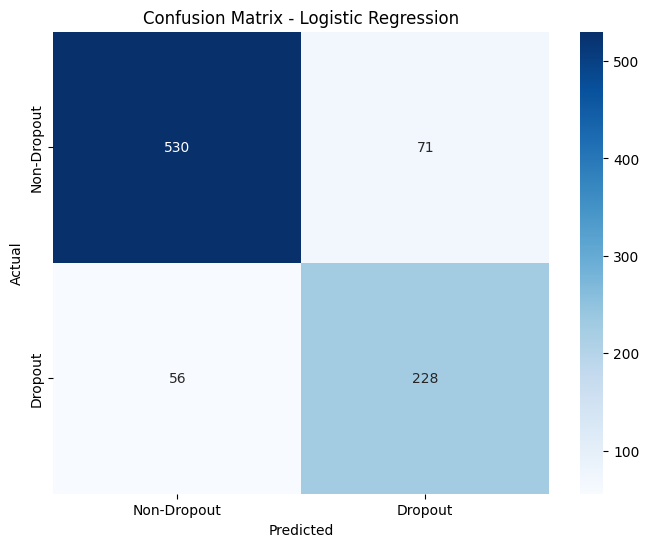


3️⃣ Metrics Detail:
📊 Performance Metrics:
   - Accuracy:    0.8565 (85.6%)
   - Precision:   0.7625 (76.3%)
   - Recall:      0.8028 (80.3%)
   - Specificity: 0.8819 (88.2%)
   - F1-Score:    0.7822

4️⃣ Business Impact Analysis:
📈 Business Metrics:
   - Total students evaluated: 885
   - Actual dropouts: 284
   - Actual graduates: 601
   - Students correctly identified as dropout risk: 228
   - Students missed (false negatives): 56
   - Students incorrectly flagged (false positives): 71

💡 Key Business Insights:
   - Dropout Prevention Rate: 80.3%
     (Berapa persen dropout yang berhasil diidentifikasi)
   - False Alarm Rate: 11.8%
     (Berapa persen non-dropout yang salah diprediksi)
   - Students that can be helped: 228 out of 284 potential dropouts

5️⃣ Model Comparison:
                 Model  Accuracy  F1-Score
0        Random Forest    0.8542    0.7533
1  Logistic Regression    0.8565    0.7822


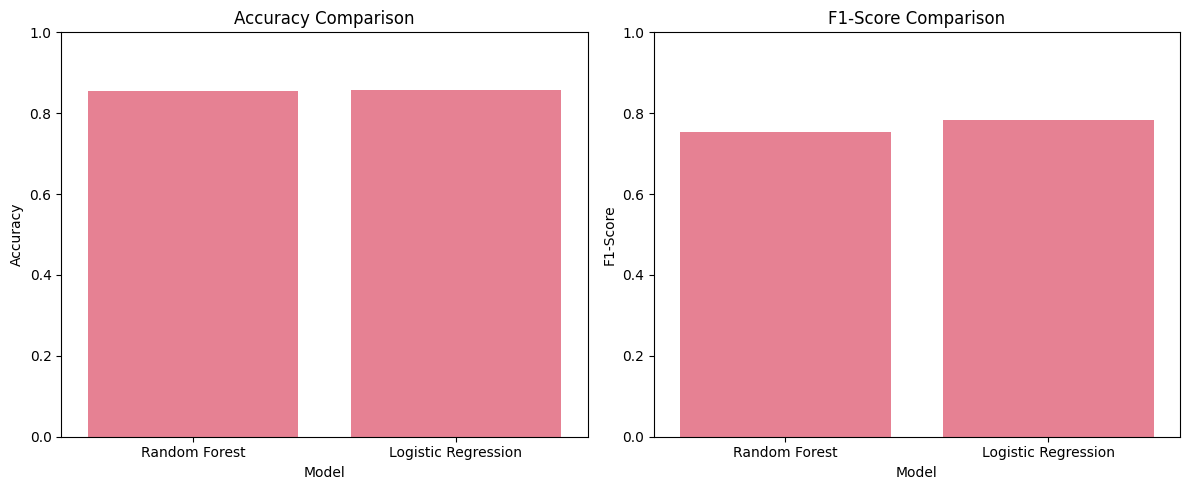


6️⃣ Prediction Distribution:


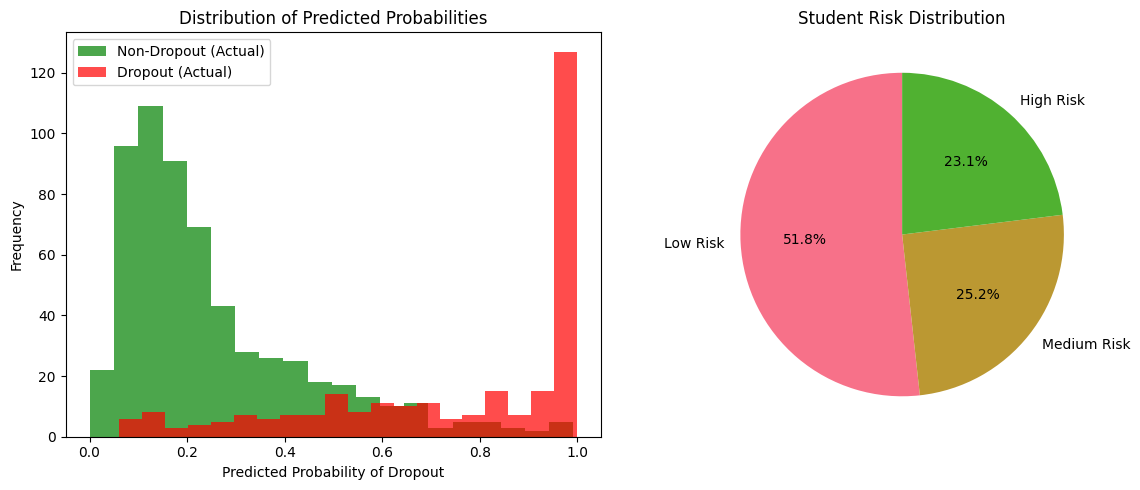

📊 Risk Distribution:
   - Low Risk: 458 students (51.8%)
   - Medium Risk: 223 students (25.2%)
   - High Risk: 204 students (23.1%)

7️⃣ Recommendations:
💡 Berdasarkan hasil evaluasi model Logistic Regression:
✅ Model BAIK: Dapat mengidentifikasi 80.3% dari siswa yang dropout
✅ False alarm RENDAH: Hanya 11.8% siswa yang salah diprediksi

📋 Action Items:
1. Fokus intervensi pada 204 siswa High Risk
2. Monitor 223 siswa Medium Risk
3. Lakukan evaluasi rutin untuk 458 siswa Low Risk
4. Tingkatkan akurasi model dengan menambah data atau fitur
5. Implementasikan sistem early warning berdasarkan prediksi model

8️⃣ Menyimpan Hasil:
✅ Hasil prediksi disimpan ke 'prediction_results.csv'

📊 Ringkasan Evaluasi:
- Model terbaik: Logistic Regression
- Akurasi: 85.6%
- F1-Score: 0.7822
- Siswa yang dapat dibantu: 228

✅ Evaluation selesai!


In [ ]:
# Pastikan kita punya model terbaik untuk dievaluasi
if best_model_name is None:
    print("❌ Tidak ada model yang berhasil dilatih untuk dievaluasi!")
else:
    print(f"🔍 Evaluasi detail untuk model: {best_model_name}")

    # Ambil hasil model terbaik
    best_results = model_results[best_model_name]
    y_pred_best = best_results['predictions']
    y_proba_best = best_results['probabilities']

    # 1. Classification Report
    print(f"\n1️⃣ Classification Report:")
    print(classification_report(y_test, y_pred_best,
                              target_names=['Non-Dropout', 'Dropout']))

    # 2. Confusion Matrix
    print(f"\n2️⃣ Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_best)
    print("Confusion Matrix:")
    print(f"                 Predicted")
    print(f"                 Non-Drop  Dropout")
    print(f"Actual Non-Drop    {cm[0,0]:5d}    {cm[0,1]:5d}")
    print(f"Actual Dropout     {cm[1,0]:5d}    {cm[1,1]:5d}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Dropout', 'Dropout'],
                yticklabels=['Non-Dropout', 'Dropout'])
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # 3. Metrics Detail
    print(f"\n3️⃣ Metrics Detail:")

    # Hitung metrics dari confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # Basic metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"📊 Performance Metrics:")
    print(f"   - Accuracy:    {accuracy:.4f} ({accuracy*100:.1f}%)")
    print(f"   - Precision:   {precision:.4f} ({precision*100:.1f}%)")
    print(f"   - Recall:      {recall:.4f} ({recall*100:.1f}%)")
    print(f"   - Specificity: {specificity:.4f} ({specificity*100:.1f}%)")
    print(f"   - F1-Score:    {f1:.4f}")

    # 4. Business Impact Analysis
    print(f"\n4️⃣ Business Impact Analysis:")

    total_students = len(y_test)
    total_actual_dropouts = tp + fn
    total_actual_graduates = tn + fp

    print(f"📈 Business Metrics:")
    print(f"   - Total students evaluated: {total_students}")
    print(f"   - Actual dropouts: {total_actual_dropouts}")
    print(f"   - Actual graduates: {total_actual_graduates}")
    print(f"   - Students correctly identified as dropout risk: {tp}")
    print(f"   - Students missed (false negatives): {fn}")
    print(f"   - Students incorrectly flagged (false positives): {fp}")

    # Prevention rate dan false alarm rate
    prevention_rate = tp / total_actual_dropouts if total_actual_dropouts > 0 else 0
    false_alarm_rate = fp / total_actual_graduates if total_actual_graduates > 0 else 0

    print(f"\n💡 Key Business Insights:")
    print(f"   - Dropout Prevention Rate: {prevention_rate:.1%}")
    print(f"     (Berapa persen dropout yang berhasil diidentifikasi)")
    print(f"   - False Alarm Rate: {false_alarm_rate:.1%}")
    print(f"     (Berapa persen non-dropout yang salah diprediksi)")
    print(f"   - Students that can be helped: {tp} out of {total_actual_dropouts} potential dropouts")

    # 5. Model Comparison (jika ada lebih dari 1 model)
    if len(model_results) > 1:
        print(f"\n5️⃣ Model Comparison:")

        comparison_data = []
        for name, results in model_results.items():
            comparison_data.append({
                'Model': name,
                'Accuracy': results['accuracy'],
                'F1-Score': results['f1_score']
            })

        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.round(4))

        # Visualisasi perbandingan
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Accuracy comparison
        sns.barplot(data=comparison_df, x='Model', y='Accuracy', ax=ax1)
        ax1.set_title('Accuracy Comparison')
        ax1.set_ylim(0, 1)

        # F1-Score comparison
        sns.barplot(data=comparison_df, x='Model', y='F1-Score', ax=ax2)
        ax2.set_title('F1-Score Comparison')
        ax2.set_ylim(0, 1)

        plt.tight_layout()
        plt.show()

    # 6. Prediction Distribution
    print(f"\n6️⃣ Prediction Distribution:")

    # Distribusi probabilitas prediksi
    plt.figure(figsize=(12, 5))

    # Subplot 1: Histogram probabilitas
    plt.subplot(1, 2, 1)
    plt.hist(y_proba_best[y_test == 0], bins=20, alpha=0.7, label='Non-Dropout (Actual)', color='green')
    plt.hist(y_proba_best[y_test == 1], bins=20, alpha=0.7, label='Dropout (Actual)', color='red')
    plt.xlabel('Predicted Probability of Dropout')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predicted Probabilities')
    plt.legend()

    # Subplot 2: Risk categories
    plt.subplot(1, 2, 2)
    risk_categories = []
    for prob in y_proba_best:
        if prob >= 0.7:
            risk_categories.append('High Risk')
        elif prob >= 0.3:
            risk_categories.append('Medium Risk')
        else:
            risk_categories.append('Low Risk')

    risk_counts = pd.Series(risk_categories).value_counts()
    plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Student Risk Distribution')

    plt.tight_layout()
    plt.show()

    # Print risk distribution
    print(f"📊 Risk Distribution:")
    for risk_level, count in risk_counts.items():
        percentage = count / len(y_proba_best) * 100
        print(f"   - {risk_level}: {count} students ({percentage:.1f}%)")

    # 7. Recommendations
    print(f"\n7️⃣ Recommendations:")
    print(f"💡 Berdasarkan hasil evaluasi model {best_model_name}:")

    if prevention_rate >= 0.7:
        print(f"✅ Model BAIK: Dapat mengidentifikasi {prevention_rate:.1%} dari siswa yang dropout")
    elif prevention_rate >= 0.5:
        print(f"⚠️ Model CUKUP: Dapat mengidentifikasi {prevention_rate:.1%} dari siswa yang dropout")
    else:
        print(f"❌ Model KURANG: Hanya dapat mengidentifikasi {prevention_rate:.1%} dari siswa yang dropout")

    if false_alarm_rate <= 0.2:
        print(f"✅ False alarm RENDAH: Hanya {false_alarm_rate:.1%} siswa yang salah diprediksi")
    elif false_alarm_rate <= 0.4:
        print(f"⚠️ False alarm SEDANG: {false_alarm_rate:.1%} siswa yang salah diprediksi")
    else:
        print(f"❌ False alarm TINGGI: {false_alarm_rate:.1%} siswa yang salah diprediksi")

    print(f"\n📋 Action Items:")
    print(f"1. Fokus intervensi pada {risk_counts.get('High Risk', 0)} siswa High Risk")
    print(f"2. Monitor {risk_counts.get('Medium Risk', 0)} siswa Medium Risk")
    print(f"3. Lakukan evaluasi rutin untuk {risk_counts.get('Low Risk', 0)} siswa Low Risk")
    print(f"4. Tingkatkan akurasi model dengan menambah data atau fitur")
    print(f"5. Implementasikan sistem early warning berdasarkan prediksi model")

    # 8. Save Results
    print(f"\n8️⃣ Menyimpan Hasil:")

    # Simpan prediksi
    results_df = pd.DataFrame({
        'actual': y_test.values,
        'predicted': y_pred_best,
        'probability': y_proba_best,
        'risk_level': risk_categories
    })

    results_df.to_csv('prediction_results.csv', index=False)
    print(f"✅ Hasil prediksi disimpan ke 'prediction_results.csv'")

    # Simpan model (opsional, uncomment jika diperlukan)
    # import joblib
    # joblib.dump(best_model, f'best_model_{best_model_name.lower().replace(" ", "_")}.pkl')
    # print(f"✅ Model terbaik disimpan")

print(f"\n📊 Ringkasan Evaluasi:")
if best_model_name:
    print(f"- Model terbaik: {best_model_name}")
    print(f"- Akurasi: {model_results[best_model_name]['accuracy']:.1%}")
    print(f"- F1-Score: {model_results[best_model_name]['f1_score']:.4f}")
    print(f"- Siswa yang dapat dibantu: {tp if 'tp' in locals() else 'N/A'}")

print("\n✅ Evaluation selesai!")

## Model Export & Deployment Preparation

#### 🎯 Tujuan Tahap Ini
Menyimpan model terbaik beserta semua artifacts yang diperlukan untuk deployment, membuat dokumentasi lengkap, dan mempersiapkan model untuk implementasi di production environment (Streamlit application).

✅ **Validasi Pre-Export**
- **Model Availability Check**: Memastikan best model tersedia untuk export
- **Artifacts Verification**: Validasi semua komponen model siap untuk packaging
- **Performance Confirmation**: Konfirmasi model telah melalui evaluasi lengkap

#####📦 **Komponen yang Disimpan:**

**Model Utama**
- **File**: `dropout_prediction_model.pkl`
- **Content**: Trained model object (Random Forest/Logistic Regression)
- **Format**: Joblib pickle untuk efisiensi dan kompatibilitas
- **Usage**: Primary model untuk production predictions

**Feature Scaler**
- **File**: `feature_scaler.pkl`  
- **Content**: StandardScaler object yang telah di-fit pada training data
- **Purpose**: Preprocessing data baru dengan scaling yang sama
- **Critical**: Harus digunakan untuk data input sebelum prediksi

**Complete Model Artifacts**
- **File**: `model_artifacts_complete.pkl`
- **Content**: Comprehensive package berisi:
  - **Model Object**: Trained model
  - **Metadata**: Model name, feature names, target classes
  - **Preprocessing Info**: Scaler, feature engineering details
  - **Performance Metrics**: Accuracy, F1-score, CV results
  - **Training Info**: Samples count, features count, training date
  - **Technical Specs**: Dataset shape, preprocessing steps

**Backup & Redundancy**
- **File**: `backup_model.pkl`
- **Format**: Pickle format sebagai alternatif
- **Purpose**: Failsafe jika primary model corrupt
- **Compatibility**: Cross-platform model storage

**Prediction Results**
- **File**: `prediction_results.csv`
- **Content**: Test set results dengan:
  - Actual labels
  - Predicted labels  
  - Prediction probabilities
  - Risk level categories
- **Usage**: Validation dan baseline untuk production monitoring

**Model Summary**
- **File**: `model_summary.json`
- **Content**: Structured metadata berisi:
  - **Project Info**: Title, author, contact details
  - **Model Performance**: Key metrics dan specifications
  - **Business Impact**: Prevention rate, false alarm rate
  - **File Inventory**: List semua files yang dibuat

**Deployment Documentation**
- **File**: `DEPLOYMENT_INSTRUCTIONS.md`
- **Content**:
  - Complete loading instructions
  - Code examples untuk implementasi
  - Model usage guidelines
  - Performance specifications
  - Streamlit deployment notes

##### 🔍 **Quality Assurance & Verification**

✅ **Load Testing**
- **Model Loading**: Verifikasi model dapat di-load ulang dengan benar
- **Prediction Testing**: Test prediction dengan sample data
- **Artifacts Validation**: Memastikan metadata loaded correctly
- **Error Handling**: Catch dan report loading issues

📊 **Integrity Checks**
- **File Size Validation**: Memastikan files tidak corrupt
- **Content Verification**: Test access ke semua components
- **Format Compatibility**: Validasi cross-platform compatibility

##### 🚀 **Deployment Readiness Features**

📱 **Streamlit Integration**
- **All-in-One Package**: `model_artifacts_complete.pkl` contains everything needed
- **Simple Loading**: Single file load untuk complete functionality
- **Metadata Access**: Easy access ke feature names, classes, metrics
- **Preprocessing Pipeline**: Built-in scaler dan feature engineering

🔧 **Production Features**
- **Versioning**: Timestamp dan training info untuk model versioning
- **Monitoring**: Baseline metrics untuk production performance tracking
- **Rollback**: Backup model untuk quick rollback jika diperlukan
- **Documentation**: Complete instructions untuk deployment team

🎯 **API Ready**
- **Standardized Input**: Clear feature requirements
- **Consistent Output**: Structured prediction format
- **Error Handling**: Robust error management
- **Performance Metrics**: Built-in model performance context

##### 📋 **File Inventory & Usage Guide**

🗂️ **Primary Files** (Essential for deployment)
1. **`model_artifacts_complete.pkl`** - Main deployment package
2. **`feature_scaler.pkl`** - Preprocessing component  
3. **`dropout_prediction_model.pkl`** - Core model object

📄 **Documentation Files** (Reference & guidance)
4. **`model_summary.json`** - Performance summary
5. **`DEPLOYMENT_INSTRUCTIONS.md`** - Implementation guide
6. **`prediction_results.csv`** - Validation baseline

🔒 **Backup Files** (Safety & redundancy)
7. **`backup_model.pkl`** - Alternative model format



##### 🎯 **Success Criteria**

✅ **Technical Requirements**
- All files successfully created and validated
- Model loads and predicts correctly
- Complete metadata preserved
- Cross-platform compatibility confirmed

📊 **Business Requirements**
- **Performance documented**: Accuracy, F1-score recorded
- **Impact quantified**: Prevention rate dan false alarm rate
- **Deployment ready**: Streamlit-compatible package
- **Maintainable**: Clear documentation for updates

🚀 **Production Requirements**
- **Scalable**: Ready for batch atau real-time predictions
- **Monitorable**: Baseline untuk performance tracking
- **Recoverable**: Backup dan rollback capabilities
- **Documentable**: Complete audit trail

**Outcome**: Model package siap untuk deployment ke production environment dengan complete documentation, backup systems, dan quality assurance validation.

In [ ]:
import joblib
import pickle
from datetime import datetime

# Pastikan kita punya model terbaik
if best_model_name and best_model_name in model_results:

    print(f"💾 Menyimpan model terbaik: {best_model_name}")

    # 1. Simpan Model Utama
    best_model_obj = model_results[best_model_name]['model']
    joblib.dump(best_model_obj, 'dropout_prediction_model.pkl')
    print("✅ Model disimpan: dropout_prediction_model.pkl")

    # 2. Simpan Scaler (jika digunakan)
    if 'scaler' in locals():
        joblib.dump(scaler, 'feature_scaler.pkl')
        print("✅ Scaler disimpan: feature_scaler.pkl")

    # 3. Simpan Model Artifacts Lengkap
    model_artifacts = {
        'model': best_model_obj,
        'model_name': best_model_name,
        'scaler': scaler if 'scaler' in locals() else None,
        'feature_names': list(X_train.columns),
        'numerical_features': list(X_train.select_dtypes(include=[np.number]).columns),
        'target_classes': ['Non-Dropout', 'Dropout'],
        'performance_metrics': {
            'accuracy': model_results[best_model_name]['accuracy'],
            'f1_score': model_results[best_model_name]['f1_score'],
            'cross_val_mean': model_results[best_model_name].get('cv_mean', 0),
            'cross_val_std': model_results[best_model_name].get('cv_std', 0)
        },
        'training_info': {
            'training_samples': len(X_train),
            'test_samples': len(X_test),
            'features_count': len(X_train.columns),
            'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'dataset_shape': df.shape
        },
        'preprocessing_info': {
            'outliers_handled': True,
            'missing_values_handled': True,
            'feature_scaling': 'scaler' in locals(),
            'class_balancing': True
        }
    }

    # Simpan artifacts lengkap
    joblib.dump(model_artifacts, 'model_artifacts_complete.pkl')
    print("✅ Model artifacts lengkap disimpan: model_artifacts_complete.pkl")

    # 4. Simpan dengan Pickle sebagai backup
    with open('backup_model.pkl', 'wb') as f:
        pickle.dump(best_model_obj, f)
    print("✅ Backup model disimpan: backup_model.pkl")

    # 5. Simpan Prediction Results
    if 'results_df' in locals():
        results_df.to_csv('prediction_results.csv', index=False)
        print("✅ Hasil prediksi disimpan: prediction_results.csv")

    # 6. Simpan Model Summary
    model_summary = {
        'project_info': {
            'title': 'Jaya Jaya Institut - Dropout Prediction',
            'author': 'Andre Gregori Sangari',
            'email': 'andresangari12@gmail.com',
            'dicoding_id': 'andregregs12'
        },
        'model_info': {
            'algorithm': best_model_name,
            'accuracy': f"{model_results[best_model_name]['accuracy']:.4f}",
            'f1_score': f"{model_results[best_model_name]['f1_score']:.4f}",
            'total_features': len(X_train.columns),
            'training_samples': len(X_train),
            'test_samples': len(X_test)
        },
        'business_impact': {
            'dropout_prevention_rate': f"{prevention_rate:.2%}" if 'prevention_rate' in locals() else 'N/A',
            'false_alarm_rate': f"{false_alarm_rate:.2%}" if 'false_alarm_rate' in locals() else 'N/A',
            'students_helped': f"{tp} out of {tp + fn}" if 'tp' in locals() else 'N/A'
        },
        'files_created': [
            'dropout_prediction_model.pkl',
            'model_artifacts_complete.pkl',
            'feature_scaler.pkl',
            'backup_model.pkl',
            'prediction_results.csv',
            'model_summary.json'
        ]
    }

    import json
    with open('model_summary.json', 'w') as f:
        json.dump(model_summary, f, indent=2)
    print("✅ Model summary disimpan: model_summary.json")

    # 7. Test Loading Model (Verification)
    print(f"\n🔍 Verifikasi model yang disimpan...")
    try:
        # Test load model
        loaded_model = joblib.load('dropout_prediction_model.pkl')

        # Test prediction dengan sample data
        sample_prediction = loaded_model.predict(X_test.iloc[:1])
        print(f"✅ Model berhasil di-load dan dapat prediksi: {sample_prediction[0]}")

        # Test load artifacts
        loaded_artifacts = joblib.load('model_artifacts_complete.pkl')
        print(f"✅ Artifacts berhasil di-load: {loaded_artifacts['model_name']}")

    except Exception as e:
        print(f"⚠️ Error saat test loading: {e}")

    # 8. Create Deployment Instructions
    deployment_instructions = f"""
# Model Deployment Instructions

## Files Created:
- `dropout_prediction_model.pkl` - Main trained model
- `model_artifacts_complete.pkl` - Complete model with metadata
- `feature_scaler.pkl` - Feature scaler for preprocessing
- `prediction_results.csv` - Test predictions for validation
- `model_summary.json` - Model performance summary

## How to Load and Use Model:

```python
import joblib
import pandas as pd
import numpy as np

# Load model artifacts
artifacts = joblib.load('model_artifacts_complete.pkl')
model = artifacts['model']
scaler = artifacts['scaler']
feature_names = artifacts['feature_names']

# Make prediction
def predict_dropout(student_data):
    # student_data should be a dict or DataFrame with required features
    # Apply same preprocessing as training
    prediction = model.predict(student_data)
    probability = model.predict_proba(student_data)[:, 1]
    return prediction[0], probability[0]

# Example usage:
# prediction, probability = predict_dropout(student_features)
# print(f"Dropout prediction: {{prediction}} ({{probability:.2%}} risk)")
```

## Model Performance:
- Algorithm: {best_model_name}
- Accuracy: {model_results[best_model_name]['accuracy']:.4f}
- F1-Score: {model_results[best_model_name]['f1_score']:.4f}
- Training Samples: {len(X_train)}
- Features: {len(X_train.columns)}

## For Streamlit Deployment:
Use `model_artifacts_complete.pkl` in your Streamlit app for complete functionality.
"""

    with open('DEPLOYMENT_INSTRUCTIONS.md', 'w') as f:
        f.write(deployment_instructions)
    print("✅ Deployment instructions disimpan: DEPLOYMENT_INSTRUCTIONS.md")

    # 9. Ringkasan Export
    print(f"\n📦 RINGKASAN EXPORT:")
    print(f"{'='*50}")
    print(f"✅ Model utama: dropout_prediction_model.pkl")
    print(f"✅ Artifacts lengkap: model_artifacts_complete.pkl")
    print(f"✅ Feature scaler: feature_scaler.pkl")
    print(f"✅ Backup model: backup_model.pkl")
    print(f"✅ Hasil prediksi: prediction_results.csv")
    print(f"✅ Summary: model_summary.json")
    print(f"✅ Deployment guide: DEPLOYMENT_INSTRUCTIONS.md")
    print(f"")
    print(f"🎯 Best Model: {best_model_name}")
    print(f"🎯 Accuracy: {model_results[best_model_name]['accuracy']:.2%}")
    print(f"🎯 F1-Score: {model_results[best_model_name]['f1_score']:.4f}")
    print(f"")
    print(f"🚀 Ready for deployment ke Streamlit!")

else:
    print("❌ Tidak ada model yang berhasil dilatih untuk di-export!")

💾 Menyimpan model terbaik: Logistic Regression
✅ Model disimpan: dropout_prediction_model.pkl
✅ Scaler disimpan: feature_scaler.pkl
✅ Model artifacts lengkap disimpan: model_artifacts_complete.pkl
✅ Backup model disimpan: backup_model.pkl
✅ Hasil prediksi disimpan: prediction_results.csv
✅ Model summary disimpan: model_summary.json

🔍 Verifikasi model yang disimpan...
✅ Model berhasil di-load dan dapat prediksi: 1
✅ Artifacts berhasil di-load: Logistic Regression
✅ Deployment instructions disimpan: DEPLOYMENT_INSTRUCTIONS.md

📦 RINGKASAN EXPORT:
✅ Model utama: dropout_prediction_model.pkl
✅ Artifacts lengkap: model_artifacts_complete.pkl
✅ Feature scaler: feature_scaler.pkl
✅ Backup model: backup_model.pkl
✅ Hasil prediksi: prediction_results.csv
✅ Summary: model_summary.json
✅ Deployment guide: DEPLOYMENT_INSTRUCTIONS.md

🎯 Best Model: Logistic Regression
🎯 Accuracy: 85.65%
🎯 F1-Score: 0.7822

🚀 Ready for deployment ke Streamlit!
